In [35]:
# Step 0: Install required libraries in Google Colab
# Run this cell in Colab to ensure all dependencies are installed
try:
    import tensorflow
except ImportError:
    !pip install tensorflow
try:
    import sklearn
except ImportError:
    !pip install scikit-learn
try:
    import matplotlib
except ImportError:
    !pip install matplotlib
try:
    import seaborn
except ImportError:
    !pip install seaborn

In [37]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib.request

In [39]:
# Step 1: Loading the dataset
# Instructions:
# - The dataset will be downloaded from the UCI repository
# - Alternatively, upload 'letter-recognition.data' to Colab or place it in the Jupyter directory
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
local_file = "letter-recognition.data"

try:
    # Downloading the dataset if not already present
    if not os.path.exists(local_file):
        urllib.request.urlretrieve(dataset_url, local_file)
        print("Dataset downloaded successfully!")

    # Define column names (first column is the letter, followed by 16 features)
    column_names = ['letter'] + [f'feature_{i}' for i in range(1, 17)]

    # Reading the CSV file (comma-separated, no header)
    df = pd.read_csv(
        local_file,
        names=column_names,
        header=None
    )
    print("Dataset loaded successfully!")
    print("First few rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: Could not download or find 'letter-recognition.data'. Please check the URL or upload the file.")
    raise
except Exception as e:
    print(f"Error loading dataset: {str(e)}")
    raise

Dataset downloaded successfully!
Dataset loaded successfully!
First few rows of the dataset:
  letter  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      T          2          8          3          5          1          8   
1      I          5         12          3          7          2         10   
2      D          4         11          6          8          6         10   
3      N          7         11          6          6          3          5   
4      G          2          1          3          1          1          8   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0         13          0          6           6          10           8   
1          5          5          4          13           3           9   
2          6          2          6          10           3           7   
3          9          4          6           4           4          10   
4          6          6          6           6           5          

In [40]:
# Step 2: Data Preprocessing
try:
    # Checking for missing values
    print("\nChecking for missing values:")
    print(df.isnull().sum())

    # Separating features (X) and target (y)
    X = df.drop('letter', axis=1)
    y = df['letter']

    # Encoding the target variable (letters A-Z to 0-25)
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Splitting the data into training and testing sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42
    )

    # Standardizing the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("\nData preprocessing completed successfully!")
except Exception as e:
    print(f"Error in preprocessing: {str(e)}")
    raise


Checking for missing values:
letter        0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
dtype: int64

Data preprocessing completed successfully!


In [41]:
# Step 3: Building the Deep Neural Network
try:
    # Number of classes (26 letters)
    num_classes = len(label_encoder.classes_)

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Softmax for multiclass
    ])
    print("\nNeural network model built successfully!")
except Exception as e:
    print(f"Error building model: {str(e)}")
    raise

# Step 4: Compiling the model
try:
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # For integer-encoded labels
        metrics=['accuracy']
    )
    print("\nModel compiled successfully!")
except Exception as e:
    print(f"Error compiling model: {str(e)}")
    raise


Neural network model built successfully!

Model compiled successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Step 5: Training the model
try:
    history = model.fit(
        X_train_scaled, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )
    print("\nModel training completed successfully!")
except Exception as e:
    print(f"Error training model: {str(e)}")
    raise

# Step 6: Evaluating the model
try:
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"\nTest Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
except Exception as e:
    print(f"Error evaluating model: {str(e)}")
    raise

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3524 - loss: 2.2782 - val_accuracy: 0.7337 - val_loss: 0.9324
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7679 - loss: 0.7961 - val_accuracy: 0.8075 - val_loss: 0.6636
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8298 - loss: 0.5746 - val_accuracy: 0.8469 - val_loss: 0.5236
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8593 - loss: 0.4740 - val_accuracy: 0.8769 - val_loss: 0.4291
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8900 - loss: 0.3822 - val_accuracy: 0.8819 - val_loss: 0.3938
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8953 - loss: 0.3344 - val_accuracy: 0.8953 - val_loss: 0.3564
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9177 - loss: 0.2785 - val_accuracy: 0.9034 - val_loss: 0.3242
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9228 - loss: 0.2592 - val_accuracy: 0.

In [43]:
# Step 7: Making predictions
try:
    y_pred_probs = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_probs, axis=1)
    print("\nPredictions generated successfully!")
except Exception as e:
    print(f"Error making predictions: {str(e)}")
    raise

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Predictions generated successfully!


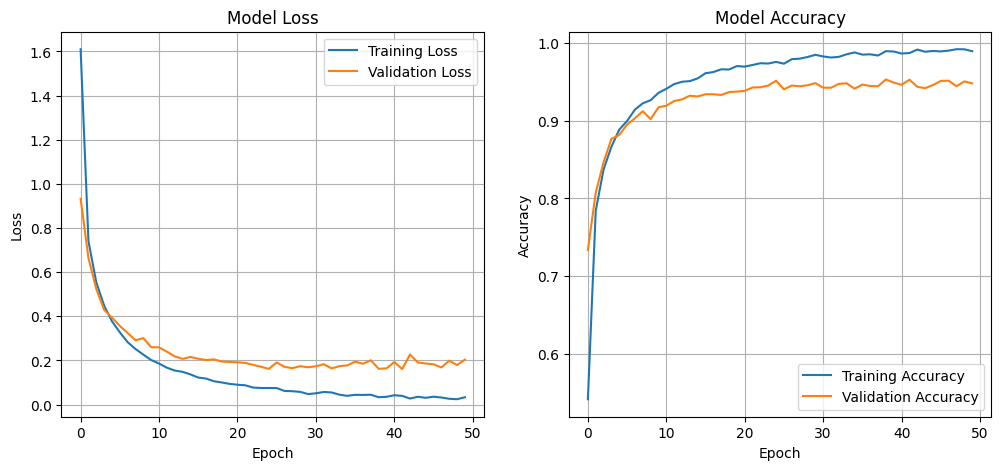


Training metrics plot displayed and saved as 'training_metrics.png'


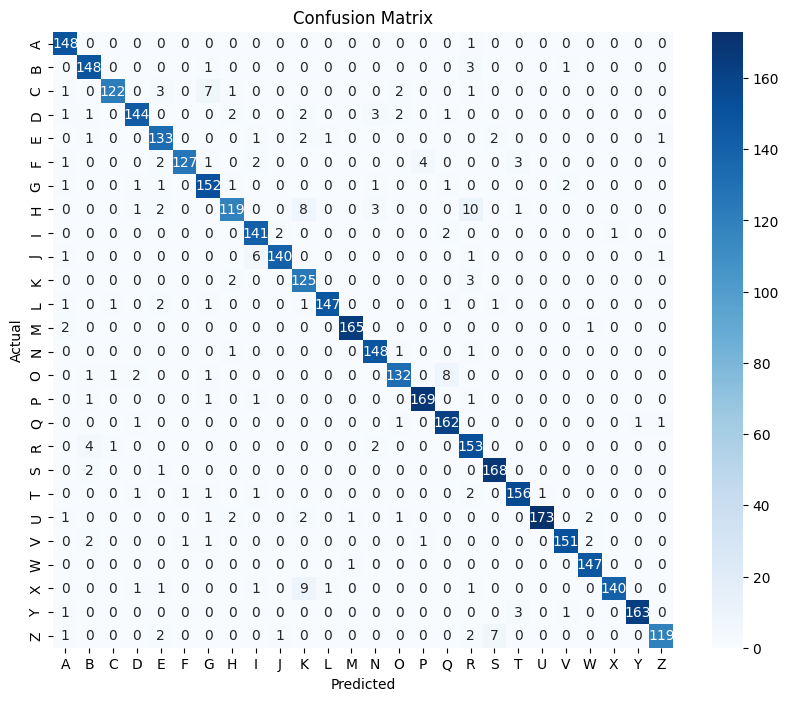

Confusion matrix plot displayed and saved as 'confusion_matrix.png'


In [44]:
# Step 8: Visualizing the training process
try:
    plt.figure(figsize=(12, 5))

    # Plotting loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plotting accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Display the plot in the notebook
    plt.show()

    # Saving the plot
    plt.savefig('training_metrics.png')
    plt.close()
    print("\nTraining metrics plot displayed and saved as 'training_metrics.png'")
except Exception as e:
    print(f"Error visualizing training metrics: {str(e)}")
    raise

# Step 9: Visualizing the confusion matrix
try:
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=label_encoder.classes_,
        yticklabels=label_encoder.classes_
    )
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Display the plot in the notebook
    plt.show()

    # Saving the confusion matrix plot
    plt.savefig('confusion_matrix.png')
    plt.close()
    print("Confusion matrix plot displayed and saved as 'confusion_matrix.png'")
except Exception as e:
    print(f"Error visualizing confusion matrix: {str(e)}")
    raise


In [45]:
# Step 10: Saving the model
try:
    model.save('letter_recognition_dnn.h5')
    print("\nModel saved as 'letter_recognition_dnn.h5'")
except Exception as e:
    print(f"Error saving model: {str(e)}")
    raise

print("\nAll processes completed successfully!")


Model saved as 'letter_recognition_dnn.h5'

All processes completed successfully!
